In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings

import math

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("student_data.csv")

print(df.columns.tolist())

['tottr', 'hhmem', 'mode_category', 'duration_min', 'trip_distance_miles', 'air_trip_distance_miles', 'arr_time', 'dep_time', 'city_from_zip', 'travel_date', 'gender', 'age', 'citizen', 'driver_license', 'transit_pass', 'car_sharing', 'employment', 'empl_status', 'commute_mode', 'disabled', 'transit_trip', 'transit_subsidy', 'walk_trips', 'bike_trips', 'student', 'school_grade', 'school_city', 'school_mode', 'education', 'person_trips', 'race', 'workday_range', 'incentive', 'vehicle_count', 'bike_count', 'residence_type', 'home_own', 'income', 'persons_count', 'worker_count', 'student_count', 'license_count', 'trip_count', 'home_city', 'vehicle_op_count', 'home_primarycity', 'WMO_code', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)', 'temperature_2m_mean (°C)', 'apparent_temperature_mean (°C)', 'daylight_dur (s)', 'total_ precip (mm)', 'rain (mm)', 'snowfall (cm)', 'precip_hours (h)', 'model_year', 'body_type', 'fuel_type1', 'purchase_type', 'ownership', 'transmission', 'cylinder

In [4]:
# Calculate the percentage of each unique value
value_counts = df['mode_category'].value_counts(normalize=True) * 100
 
# Display the results
print(value_counts)

mode_category
6.0     65.319222
1.0     15.020334
5.0      9.936793
18.0     2.587094
2.0      2.356803
15.0     1.923171
7.0      1.180852
4.0      0.325837
24.0     0.244990
26.0     0.242540
11.0     0.129845
14.0     0.095546
10.0     0.095546
8.0      0.080847
25.0     0.075947
16.0     0.056348
9.0      0.053898
13.0     0.051448
17.0     0.048998
19.0     0.048998
23.0     0.031849
28.0     0.026949
27.0     0.024499
29.0     0.012249
21.0     0.009800
3.0      0.007350
12.0     0.007350
20.0     0.002450
22.0     0.002450
Name: proportion, dtype: float64


In [5]:
def categorize_mode(mode):
    if mode in [1,2, 3, 4]:  # Walk, bike, wheelchair/mobility scooter, other non-motorized
        return 'Active Transportation'
    elif mode in [5,8,10]:  # Auto Driver, motorcycle, rental car
        return 'Auto Driver'
    elif mode in [6,7,9]:  # Auto Passenger, Carpool, taxi
        return 'Auto Passenger'
    elif mode in [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]:  # Transit modes
        return 'Transit'
    else:  # Everything else
        return 'Other'

In [6]:
# Apply the categorization function to the 'Mode of transport' column
df['mode_category'] = df['mode_category'].astype(int).apply(categorize_mode)

# Calculate the percentage of each mode in the dataset
mode_percentage = df['mode_category'].value_counts(normalize=True) * 100

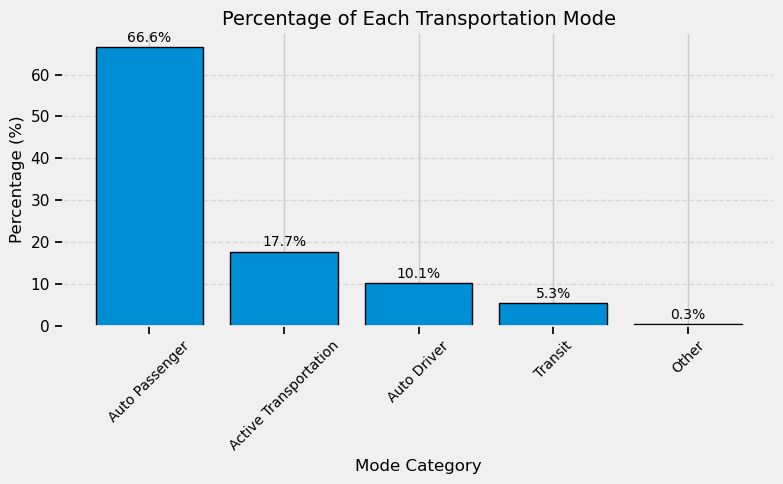

In [7]:
# Plot the percentages as a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(mode_percentage.index, mode_percentage, edgecolor='black')
 
# Overlay the percentage values on the bars
for bar, percentage in zip(bars, mode_percentage):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        bar.get_height() + 0.5,  # Y-coordinate
        f'{percentage:.1f}%',  # Text to display
        ha='center', va='bottom', fontsize=10, color='black'  # Alignment and style
    )
 
# Add chart details
plt.title('Percentage of Each Transportation Mode', fontsize=14)
plt.xlabel('Mode Category', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
df['mode_category'].unique()

array(['Auto Passenger', 'Active Transportation', 'Transit',
       'Auto Driver', 'Other'], dtype=object)

In [9]:
# employment status has been filtered when seperating students & workers
# veh_op_count overlaps with veh_count
# school mode overlaps with mode_category
# can't use trip_distance_miles since it creates data leakage (observed trip that has already happened)
# similar for duration
# commute_mode is for workers
df = df.drop(columns=['employment', 'empl_status', 'vehicle_op_count', 'school_mode', 'duration_min', 'trip_distance_miles', 'commute_mode'])

In [10]:
df.describe()

,tottr,hhmem,air_trip_distance_miles,gender,age,citizen,driver_license,transit_pass,car_sharing,disabled,...,snowfall (cm),precip_hours (h),model_year,body_type,fuel_type1,purchase_type,ownership,transmission,cylinders,veh_type
count,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,...,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.000000,40818.00000,40818.000000
mean,2.554020,1.307928,5.141473,1.504826,13.736048,1.061860,1.832500,1.947425,1.998555,1.980229,...,0.018991,1.600936,337.900387,0.575040,0.180754,0.274144,0.185825,0.192464,0.48116,0.350826
std,1.505048,1.316051,28.540283,0.499983,10.618453,0.240904,0.373426,0.223186,0.037992,0.139213,...,0.394568,4.271911,749.642615,1.765642,0.409494,0.633646,0.432569,0.463056,1.26067,0.775892
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.000000,0.608096,1.000000,8.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2.000000,1.000000,1.560744,2.000000,12.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,3.000000,2.000000,3.857622,2.000000,16.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,41.000000,6.000000,2703.755019,2.000000,99.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,16.380000,24.000000,2013.000000,13.000000,5.000000,2.000000,4.000000,3.000000,6.00000,6.000000


# General EDA

In [11]:
# check for numeric values 
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

print("Numeric columns:")
print(numeric_columns)

Numeric columns:
['tottr', 'hhmem', 'air_trip_distance_miles', 'gender', 'age', 'citizen', 'driver_license', 'transit_pass', 'car_sharing', 'disabled', 'transit_trip', 'transit_subsidy', 'walk_trips', 'bike_trips', 'student', 'school_grade', 'education', 'person_trips', 'race', 'incentive', 'vehicle_count', 'bike_count', 'residence_type', 'home_own', 'income', 'persons_count', 'worker_count', 'student_count', 'license_count', 'trip_count', 'WMO_code', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)', 'temperature_2m_mean (°C)', 'apparent_temperature_mean (°C)', 'daylight_dur (s)', 'total_ precip (mm)', 'rain (mm)', 'snowfall (cm)', 'precip_hours (h)', 'model_year', 'body_type', 'fuel_type1', 'purchase_type', 'ownership', 'transmission', 'cylinders', 'veh_type']


## Categorical Features

Here, we observe that not all columns are numerical variables; some are encoded categorical variables. Let’s separate them accordingly after binning model year.

(Insights from later EDA) - Model year appears to have a wide range of values, including a significant number of entries for 0, representing “No Car”. The current distribution is not very clear due to the range and sparse data in other values. To address this, binning the model year into broader categories, such as ranges of years, can improve the visualization and interpretability of this feature. Let’s use the binned version to analyze its potential impact more effectively.

In [12]:
def bin_model_year(year):
    if year == 0:
        return 'No Car'
    elif year < 2000:
        return 'Before 2000'
    elif 2000 <= year <= 2013:
        return '2000-2013'
    else:
        return 'Unknown'

df['model_year'] = df['model_year'].apply(bin_model_year)

Categorical columns are separated based on the number of unique values. Columns with up to three categories work well with stacked bar charts, while those with more MAY require different visualizations or more space to avoid clutter. This ensures the plots are clear and easy to interpret.

In [13]:
# List of columns to plot
categorical_columns = ['gender', 'citizen', 'driver_license', 'transit_pass', 
                       'car_sharing', 'education', 'incentive', 'race', 
                       'residence_type', 'home_own', 'income', 'WMO_code', 
                       'transit_subsidy', 'school_grade', 'disabled', 
                       'body_type', 'fuel_type1', 'purchase_type', 'model_year', 
                       'transmission', 'veh_type', 'cylinders', 'ownership', 'student']

# Compute unique counts for the categorical columns
unique_counts = {col: df[col].nunique() for col in categorical_columns}

# Lists based on conditions
simple_categorical_columns = [col for col, count in unique_counts.items() if count <= 3]
complex_categorical_columns = [col for col, count in unique_counts.items() if count > 3]

print("Categorical Columns with up to 3 types:", simple_categorical_columns)
print("Categorical Columns with more than 3 types:", complex_categorical_columns)

Categorical Columns with up to 3 types: ['gender', 'citizen', 'driver_license', 'transit_pass', 'car_sharing', 'incentive', 'home_own', 'transit_subsidy', 'disabled', 'purchase_type', 'model_year', 'student']
Categorical Columns with more than 3 types: ['education', 'race', 'residence_type', 'income', 'WMO_code', 'school_grade', 'body_type', 'fuel_type1', 'transmission', 'veh_type', 'cylinders', 'ownership']


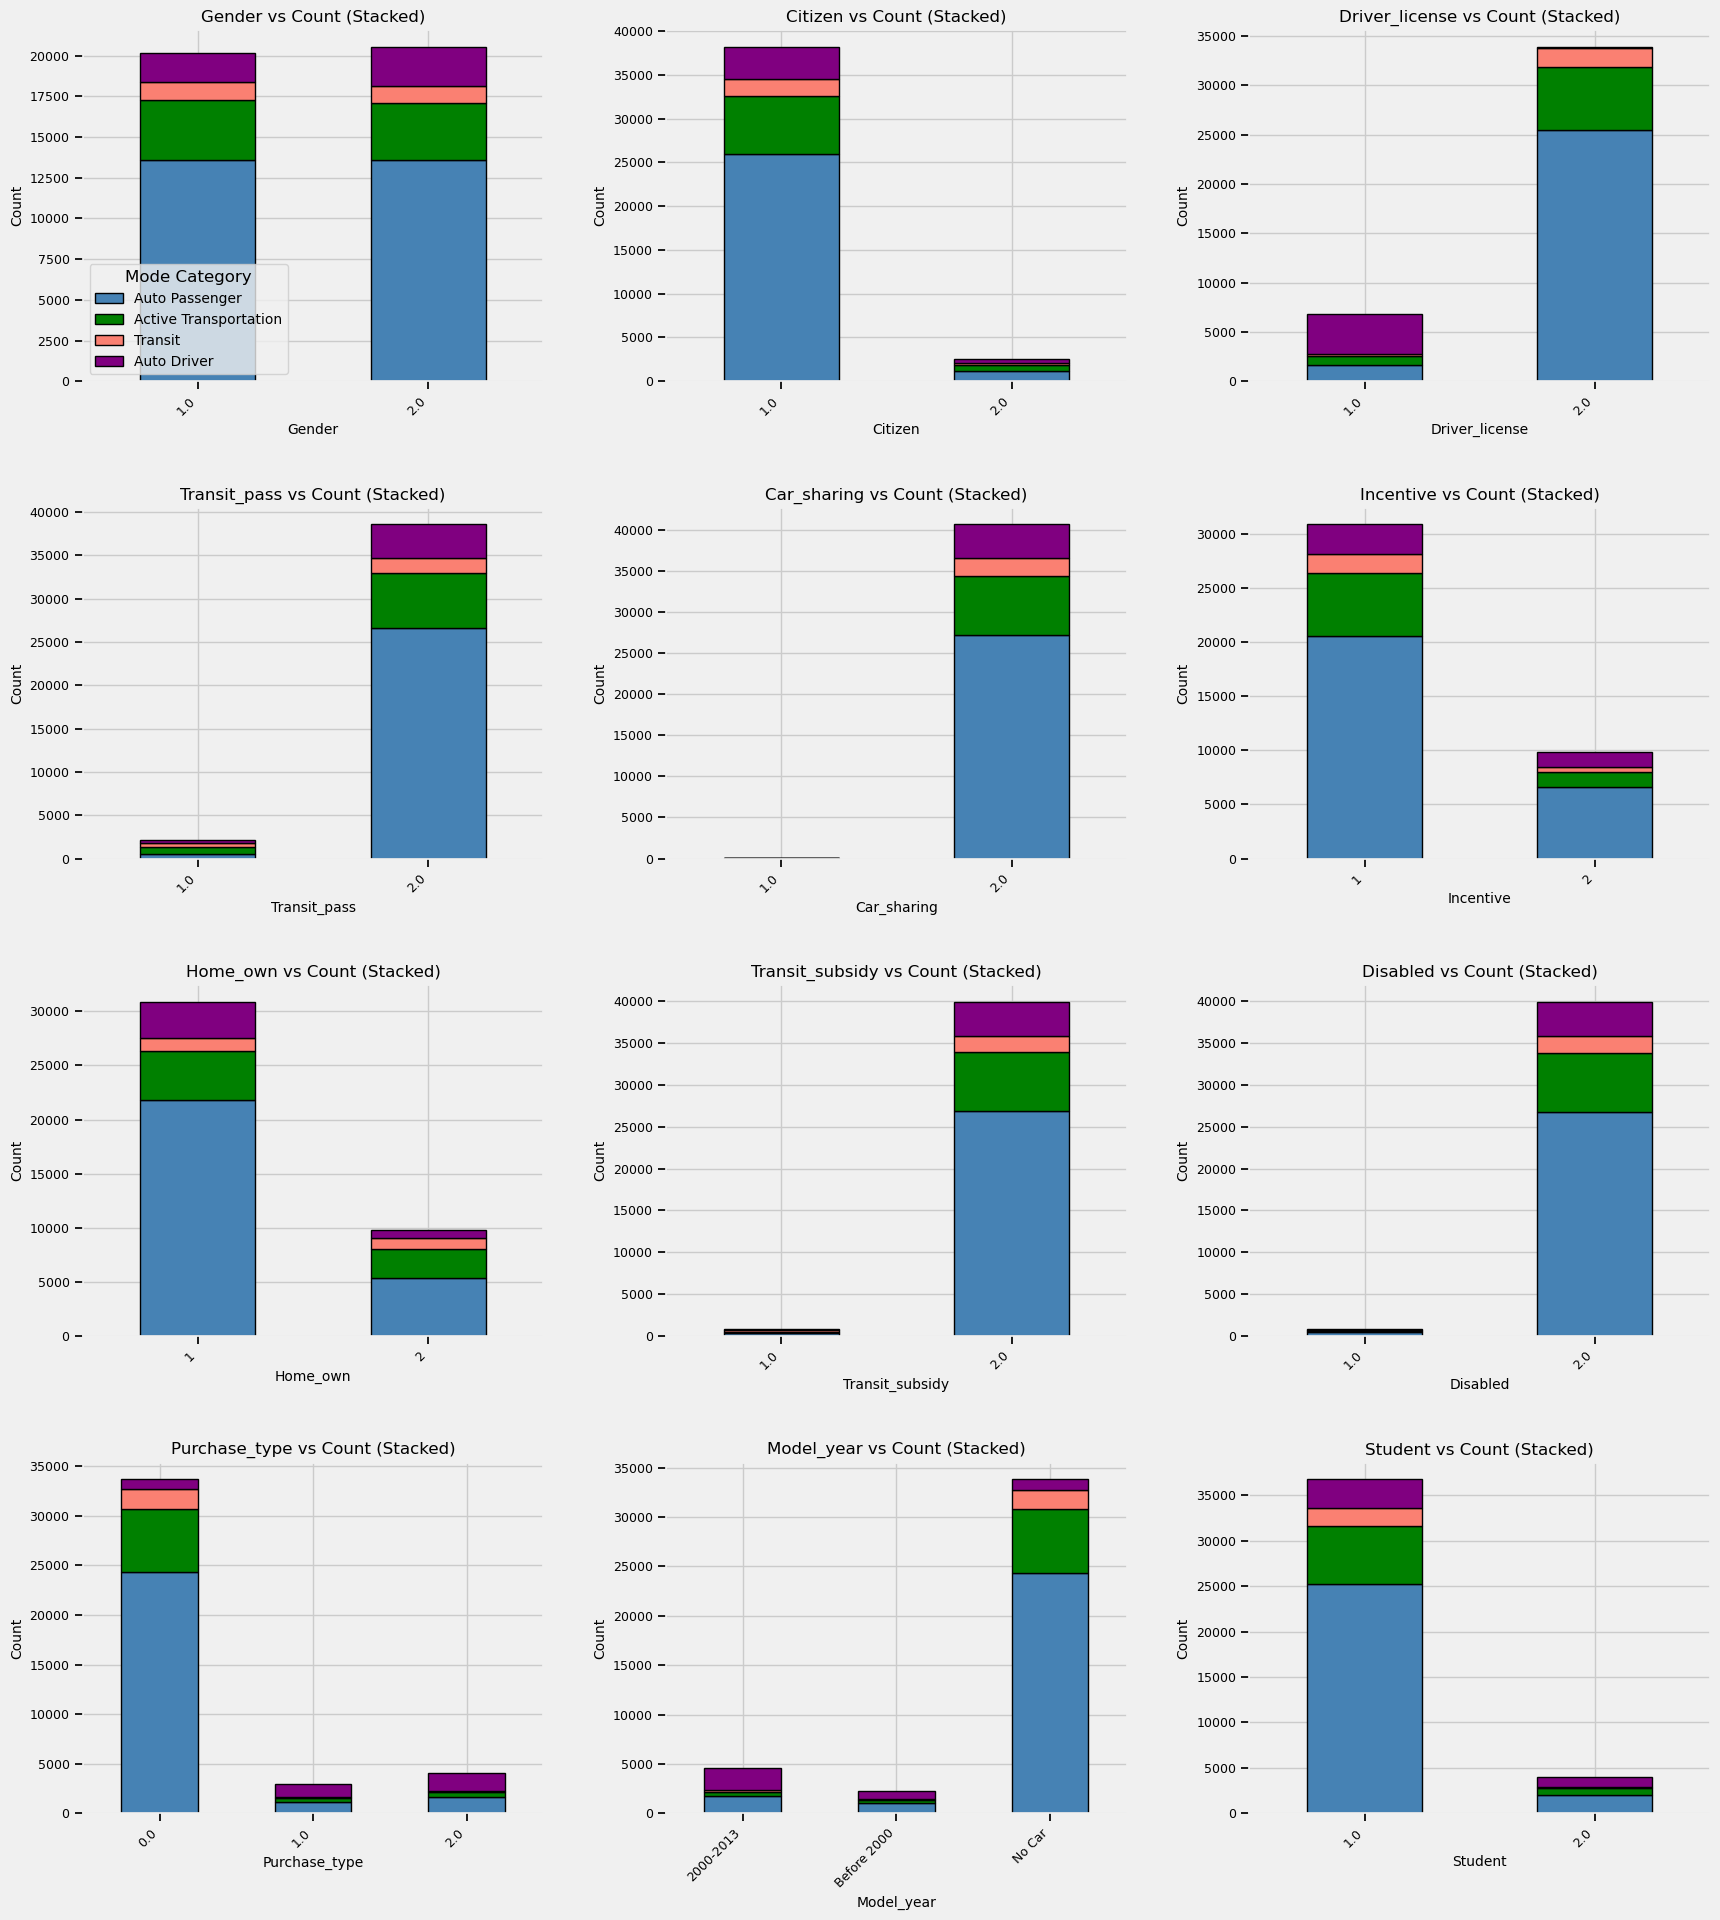

In [14]:
# Define custom colors for the mode categories
custom_colors = {
    'Active Transportation': 'green',
    'Auto Driver': 'purple',
    'Auto Passenger': 'steelblue',
    'Transit': 'salmon',
    'Other': 'gray'
}

# Filter for specific mode categories
modes_to_plot = ['Auto Passenger', 'Active Transportation', 'Transit', 'Auto Driver']
df_filtered = df[df['mode_category'].isin(modes_to_plot)]

# Determine grid size
n_cols = 3
n_rows = math.ceil(len(simple_categorical_columns) / n_cols)

# Create the plot grid
plt.figure(figsize=(n_cols * 6, n_rows * 5))

for i, column in enumerate(simple_categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Prepare data for stacked bar plot
    stacked_data = df_filtered.groupby([column, 'mode_category']).size().unstack(fill_value=0)
    
    # Ensure the order of columns in stacked_data matches the custom_colors dictionary
    stacked_data = stacked_data[modes_to_plot]  # Reorder columns explicitly
    
    # Plot the data with corrected colors
    stacked_data.plot(
        kind='bar',  # Vertical bar plot
        stacked=True, 
        ax=plt.gca(), 
        color=[custom_colors[col] for col in stacked_data.columns],  # Ensure matching colors
        edgecolor="black"
    )
    
    # Add titles and axis labels
    plt.title(f'{column.capitalize()} vs Count (Stacked)', fontsize=12)
    plt.ylabel('Count', fontsize=10)
    plt.xlabel(column.capitalize(), fontsize=10)
    plt.xticks(fontsize=9, rotation=45, ha='right')
    plt.yticks(fontsize=9)
    
    # Place the legend only on the first plot
    if i == 0:
        plt.legend(title='Mode Category', fontsize=10, loc='best')
    else:
        plt.legend([], [], frameon=False)  # Remove legends from subsequent plots

# Adjust layout for better spacing
plt.tight_layout(pad=3)
plt.show()

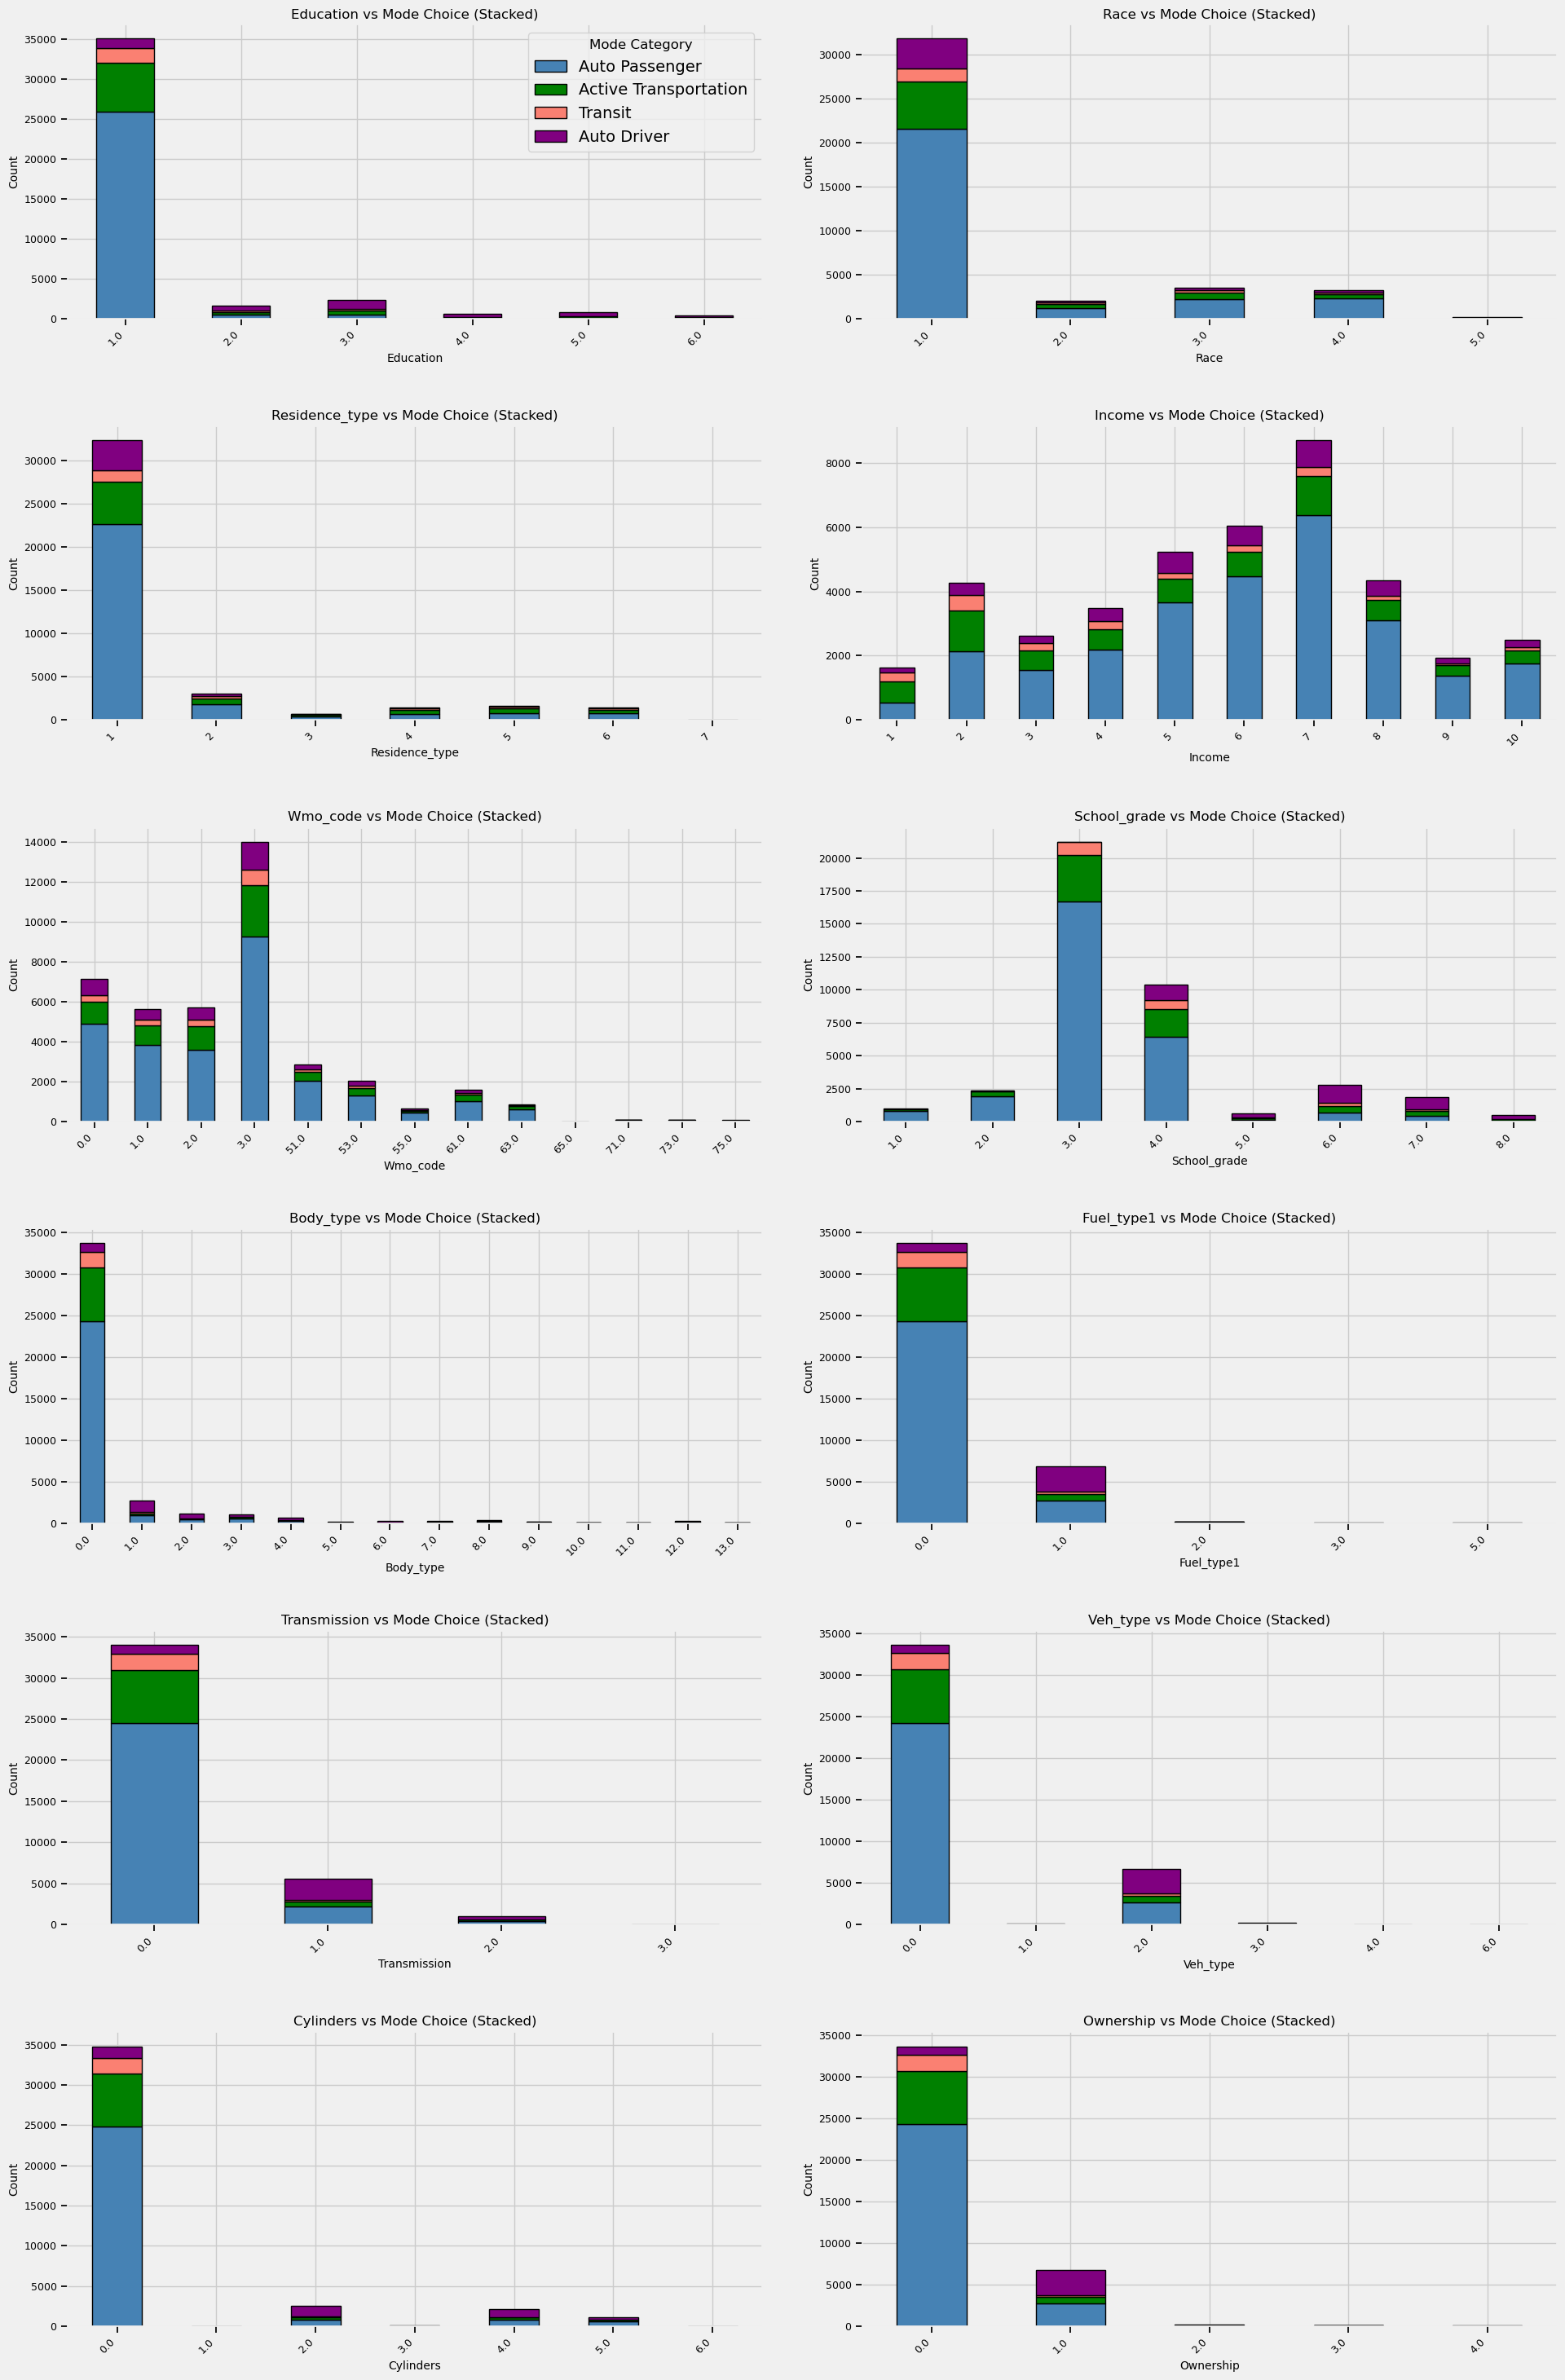

In [15]:
# Determine grid size
n_cols = 2
n_rows = math.ceil(len(complex_categorical_columns) / n_cols)

# Create the plot grid
plt.figure(figsize=(n_cols * 10, n_rows * 5))  # Increase the width of the figure

for i, column in enumerate(complex_categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Group data for stacked bar plot
    stacked_data = df_filtered.groupby([column, 'mode_category']).size().unstack(fill_value=0)
    stacked_data = stacked_data[modes_to_plot]  # Ensure consistent order of mode categories
    
    # Create the stacked bar plot
    stacked_data.plot(
        kind='bar',
        stacked=True,
        ax=plt.gca(),
        color=[custom_colors[col] for col in modes_to_plot],  # Use custom colors
        edgecolor="black"
    )
    
    # Add titles and axis labels
    plt.title(f'{column.capitalize()} vs Mode Choice (Stacked)', fontsize=12)
    plt.xlabel(column.capitalize(), fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(fontsize=9)
    
    # Place legend only on the first subplot
    if i == 0:
        plt.legend(title='Mode Category', fontsize=14, loc='upper right')
    else:
        plt.legend([], [], frameon=False)  # Remove legend from subsequent plots

# Adjust layout for better spacing
plt.tight_layout(pad=3)
plt.show()

## Numercial Weather Features

### Why Separate Variables and Filter Zeros?

For weather-related features like `total_precip (mm)`, `rain (mm)`, `snowfall (cm)`, and `precip_hours (h)`, the majority of the values are zero, representing days without precipitation or snowfall (which makes sense since the dataset is in California). Including these zeros in the plots would overshadow any potential trends in data, making it hard to understand how these variables influence mode choice.

We chose box plots because they are great for comparing the distribution of continuous variables across categories, like mode choices. Box plots highlight the median, range, and outliers, making it easier to see differences in how variables like temperature or precipitation vary for each mode category. This is particularly useful for identifying trends that might help predict mode choice.

Separating the variables into different plots and filtering out zeros where necessary ensures the visualizations are clear and focused. This approach makes the data easier to interpret and helps identify which features are most relevant for building predictive models.

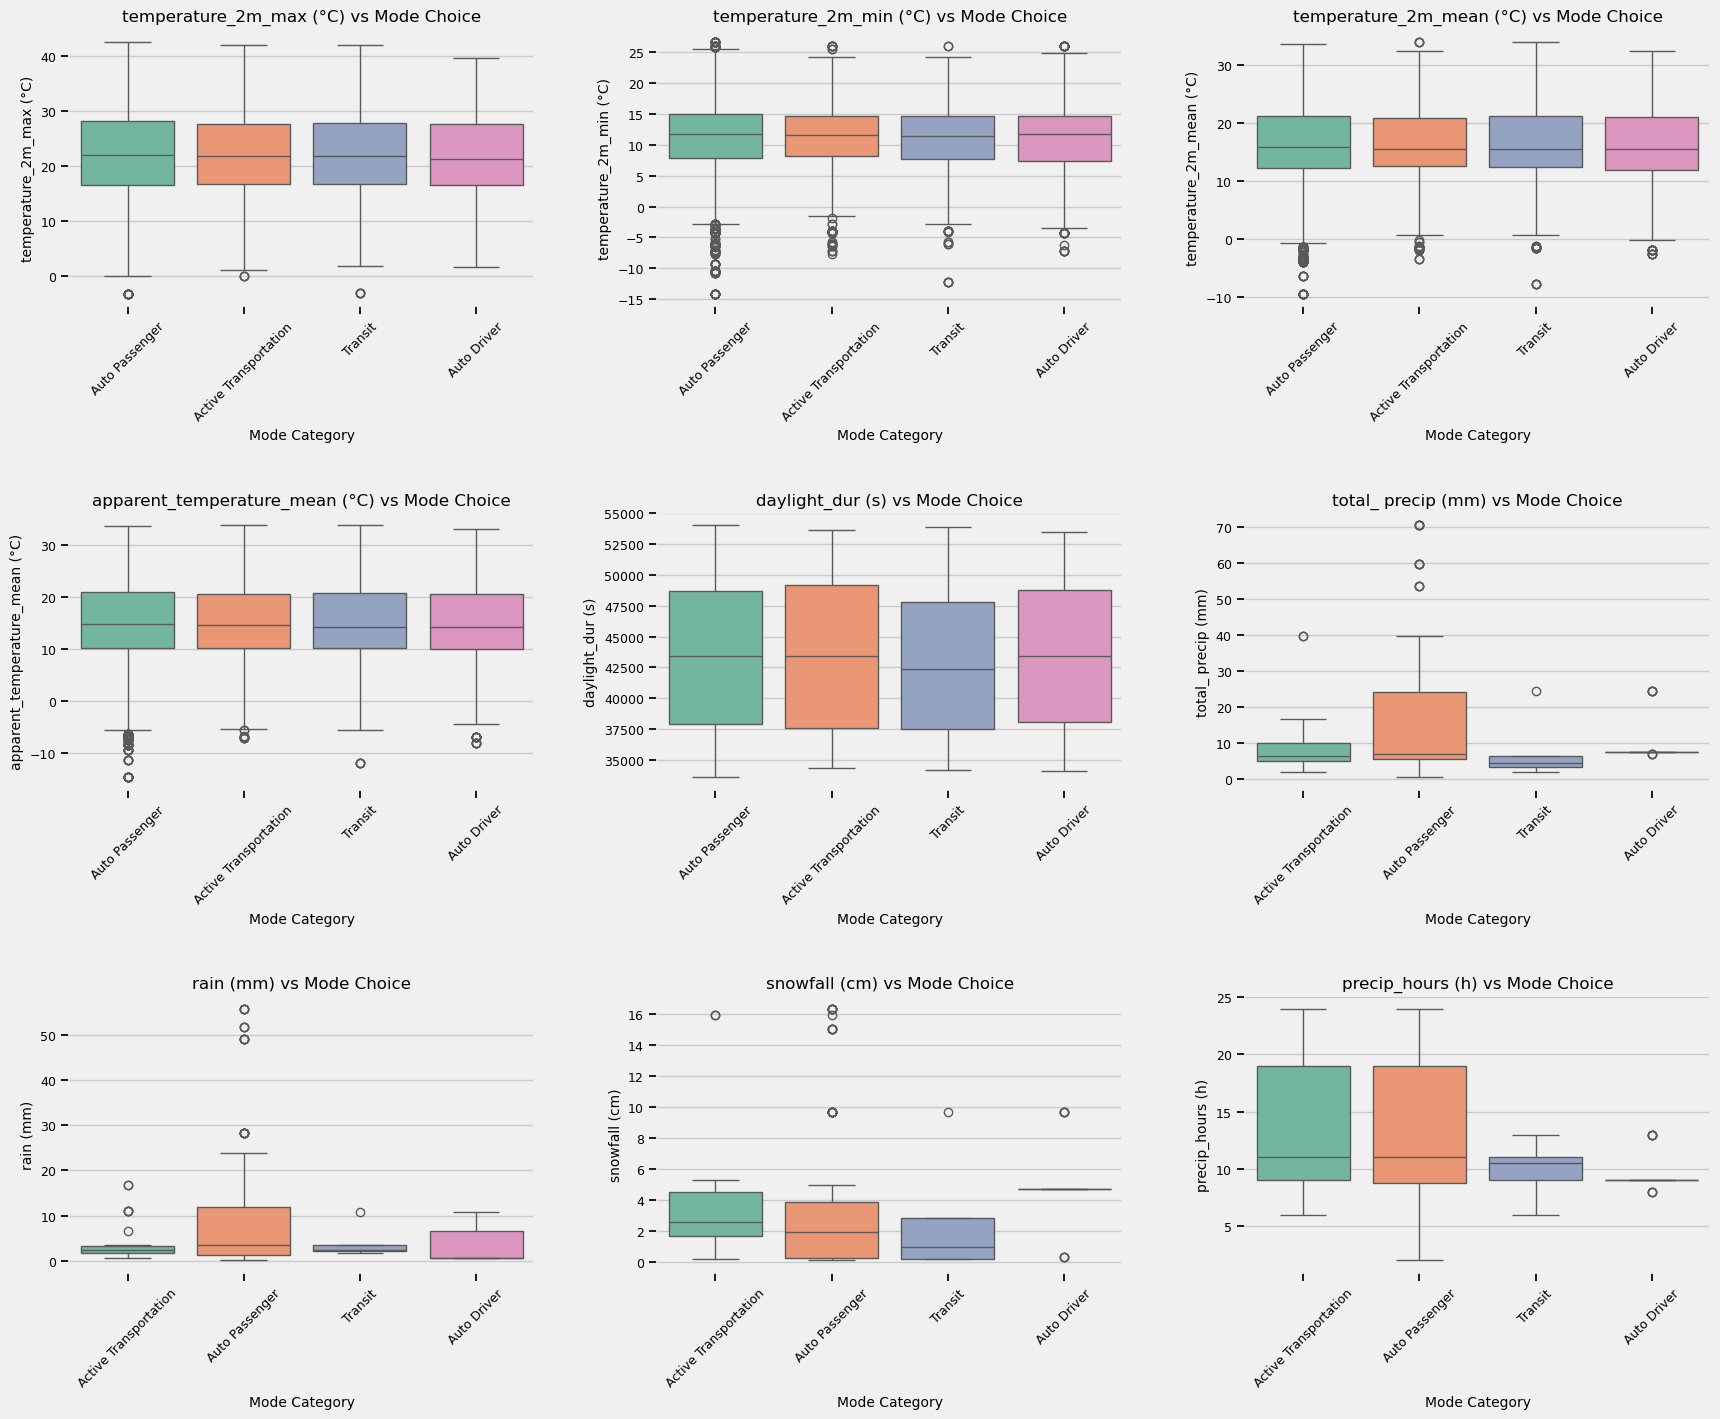

In [16]:
# Correct the feature names in numeric_weather_features
numeric_weather_features = [
    'temperature_2m_max (°C)',
    'temperature_2m_min (°C)',
    'temperature_2m_mean (°C)',
    'apparent_temperature_mean (°C)',
    'daylight_dur (s)',
    'total_ precip (mm)',
    'rain (mm)',
    'snowfall (cm)',
    'precip_hours (h)'
]

# Features to filter for non-zero values
features_to_filter = ['total_ precip (mm)', 'rain (mm)', 'snowfall (cm)', 'precip_hours (h)']

# Create a copy of the dataset and filter out rows where these features are zero
df_filtered_nonzero = df_filtered.copy()
for feature in features_to_filter:
    df_filtered_nonzero = df_filtered_nonzero[df_filtered_nonzero[feature] > 0]

# Create the plot grid
n_cols = 3
n_rows = math.ceil(len(numeric_weather_features) / n_cols)
plt.figure(figsize=(n_cols * 6, n_rows * 5))

for i, feature in enumerate(numeric_weather_features):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Select the appropriate dataset (filtered for non-zero values for the last four features)
    data_to_plot = (
        df_filtered_nonzero if feature in features_to_filter else df_filtered
    )
    
    # Create box plots to compare distributions for mode categories
    sns.boxplot(
        data=data_to_plot,
        x='mode_category',
        y=feature,
        palette='Set2'
    )
    
    plt.title(f'{feature} vs Mode Choice', fontsize=12)
    plt.xlabel('Mode Category', fontsize=10)
    plt.ylabel(feature, fontsize=10)
    plt.xticks(rotation=45, fontsize=9)
    plt.yticks(fontsize=9)

# Adjust layout for better spacing
plt.tight_layout(pad=3)
plt.show()

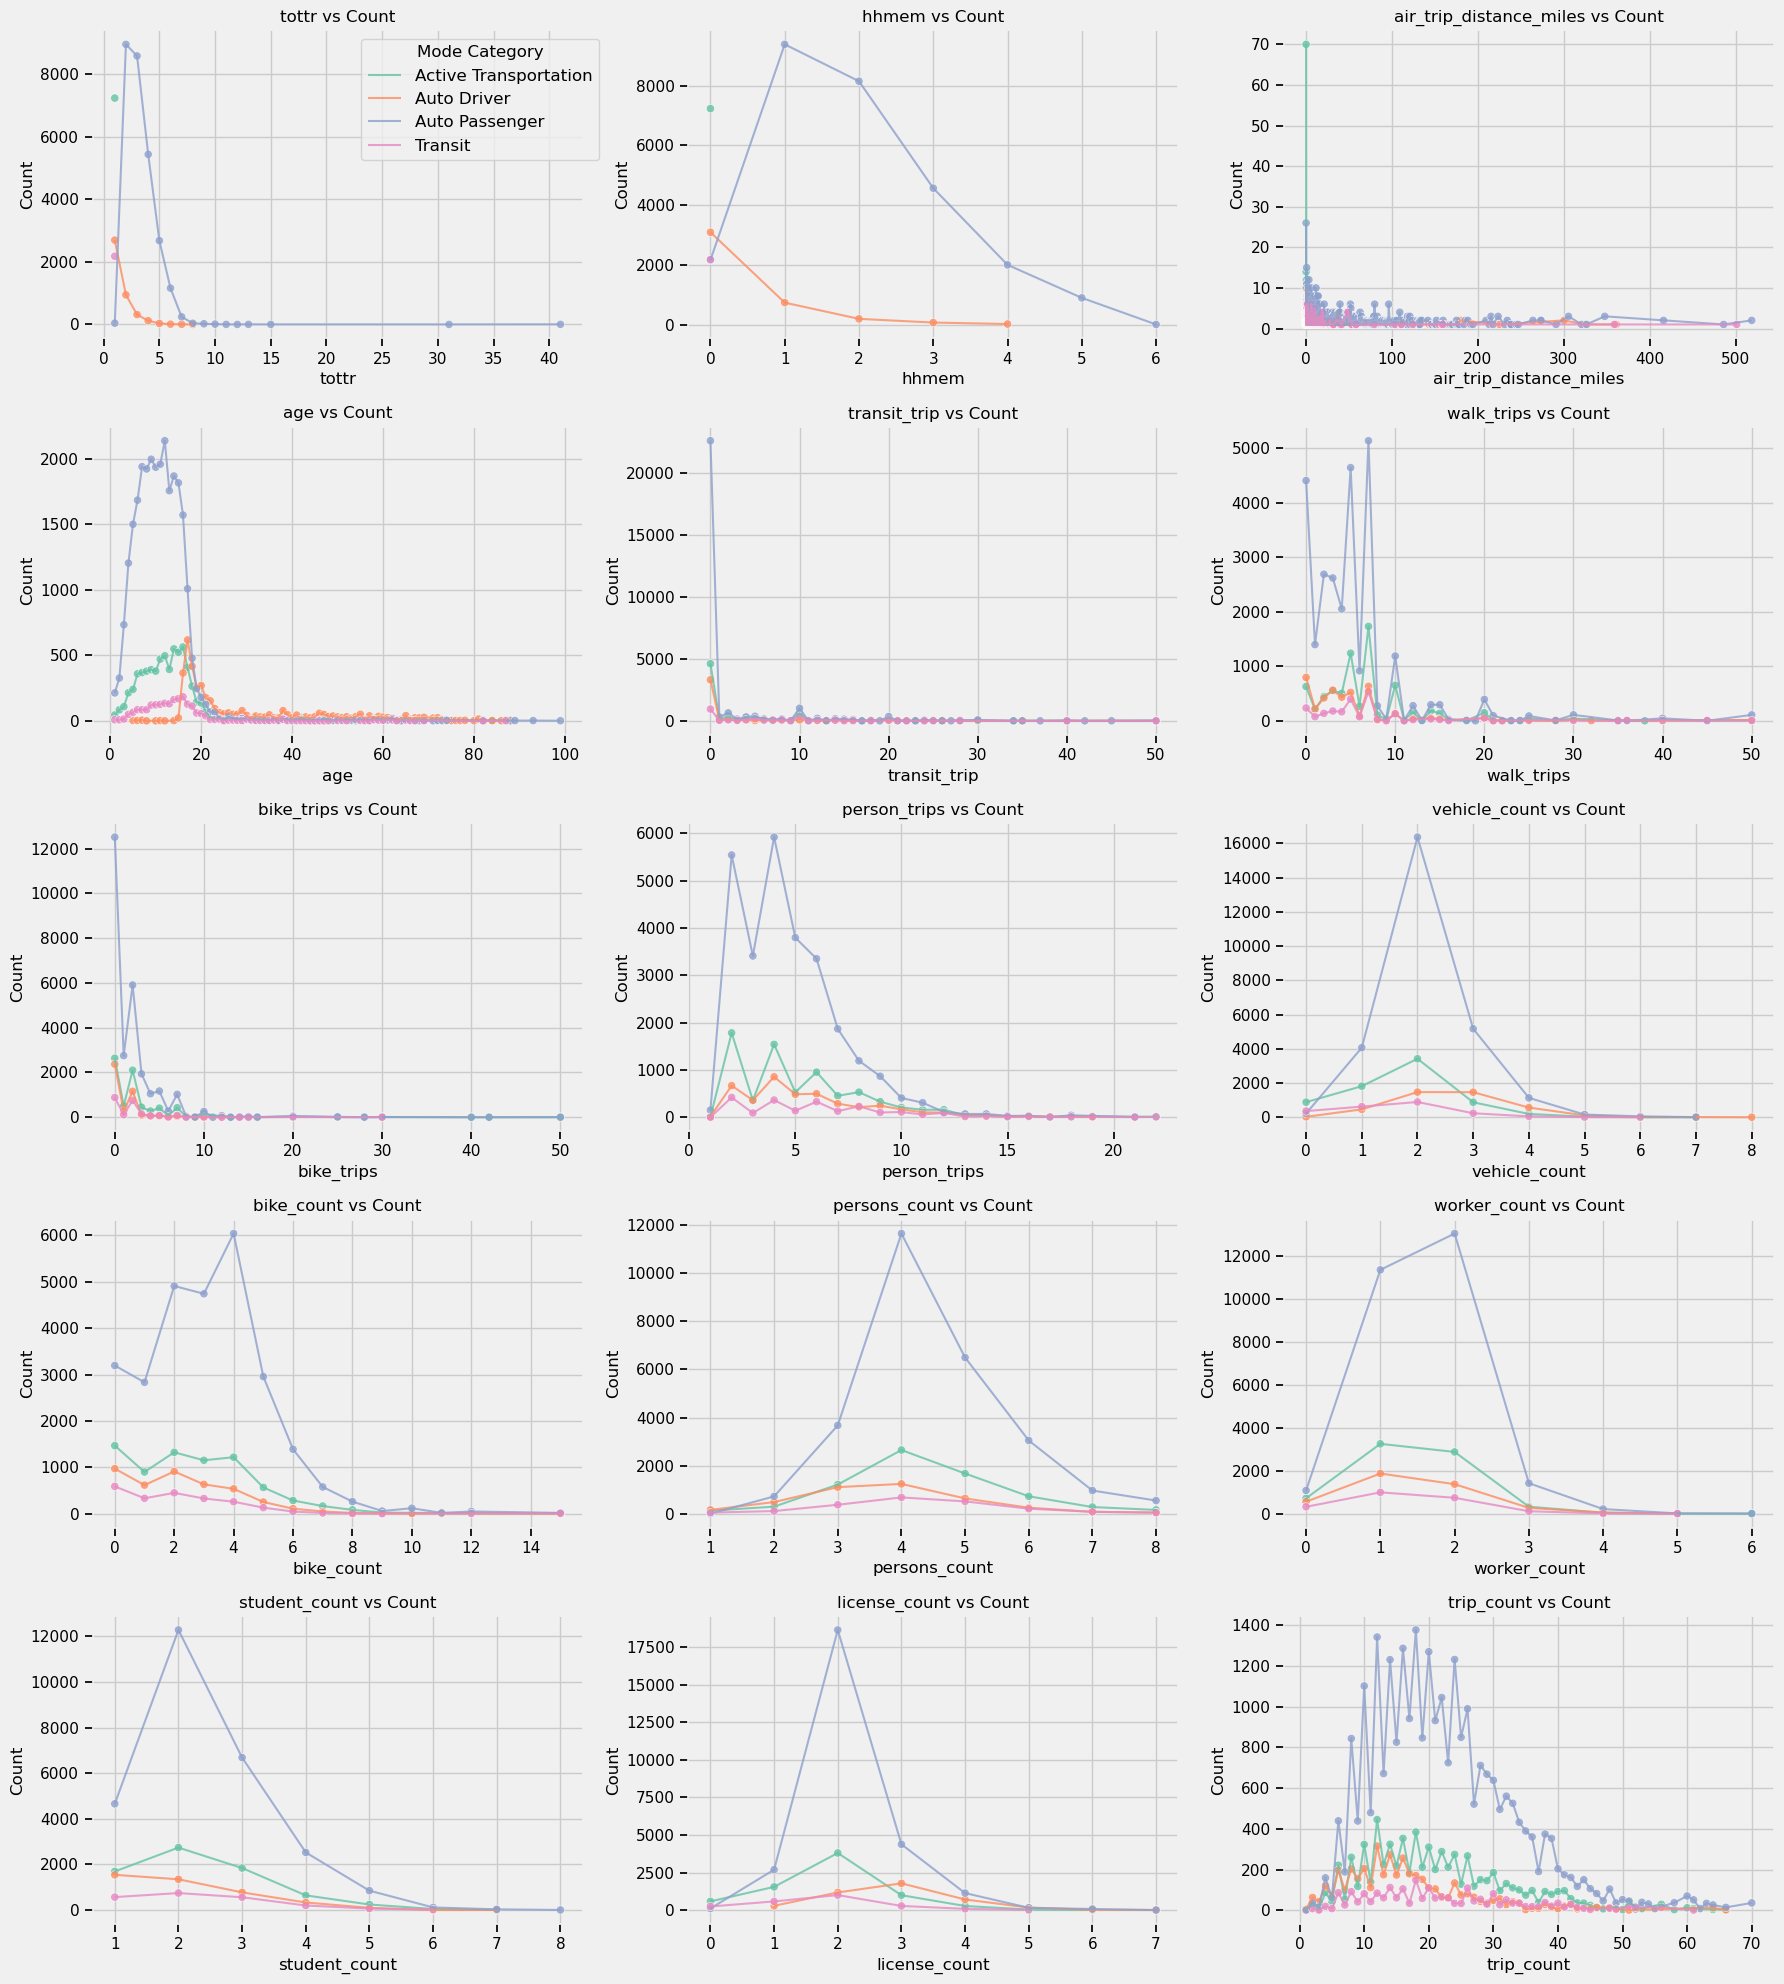

In [17]:
# Update numeric columns and exclude categorical ones
numeric_columns = [
    col for col in numeric_columns 
    if col not in categorical_columns and col not in numeric_weather_features]

# Determine grid size
n_cols = 3
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Create the plot grid
plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, feature in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Group data by numeric feature and mode to calculate counts
    grouped_data = df_filtered.groupby(['mode_category', feature]).size().reset_index(name='count')
    
    # Line plot for the current feature
    sns.lineplot(
        data=grouped_data,
        x=feature,
        y='count',
        hue='mode_category',
        palette='Set2',
        alpha=0.8
    )
    
    # Scatter plot over the line to show individual points
    sns.scatterplot(
        data=grouped_data,
        x=feature,
        y='count',
        hue='mode_category',
        palette='Set2',
        alpha=0.8,
        legend=False  # Avoid duplicate legends
    )
    
    plt.title(f'{feature} vs Count')
    plt.xlabel(feature)
    plt.ylabel('Count')
    
    # Only add the legend once
    if i == 0:
        plt.legend(title='Mode Category', bbox_to_anchor=(1.05, 1), loc='best', fontsize=12)
    else:
        plt.legend([], [], frameon=False)

# Adjust layout
plt.tight_layout()
plt.show()

Scale right-skewed numeric features to improve interpretability and visualization:

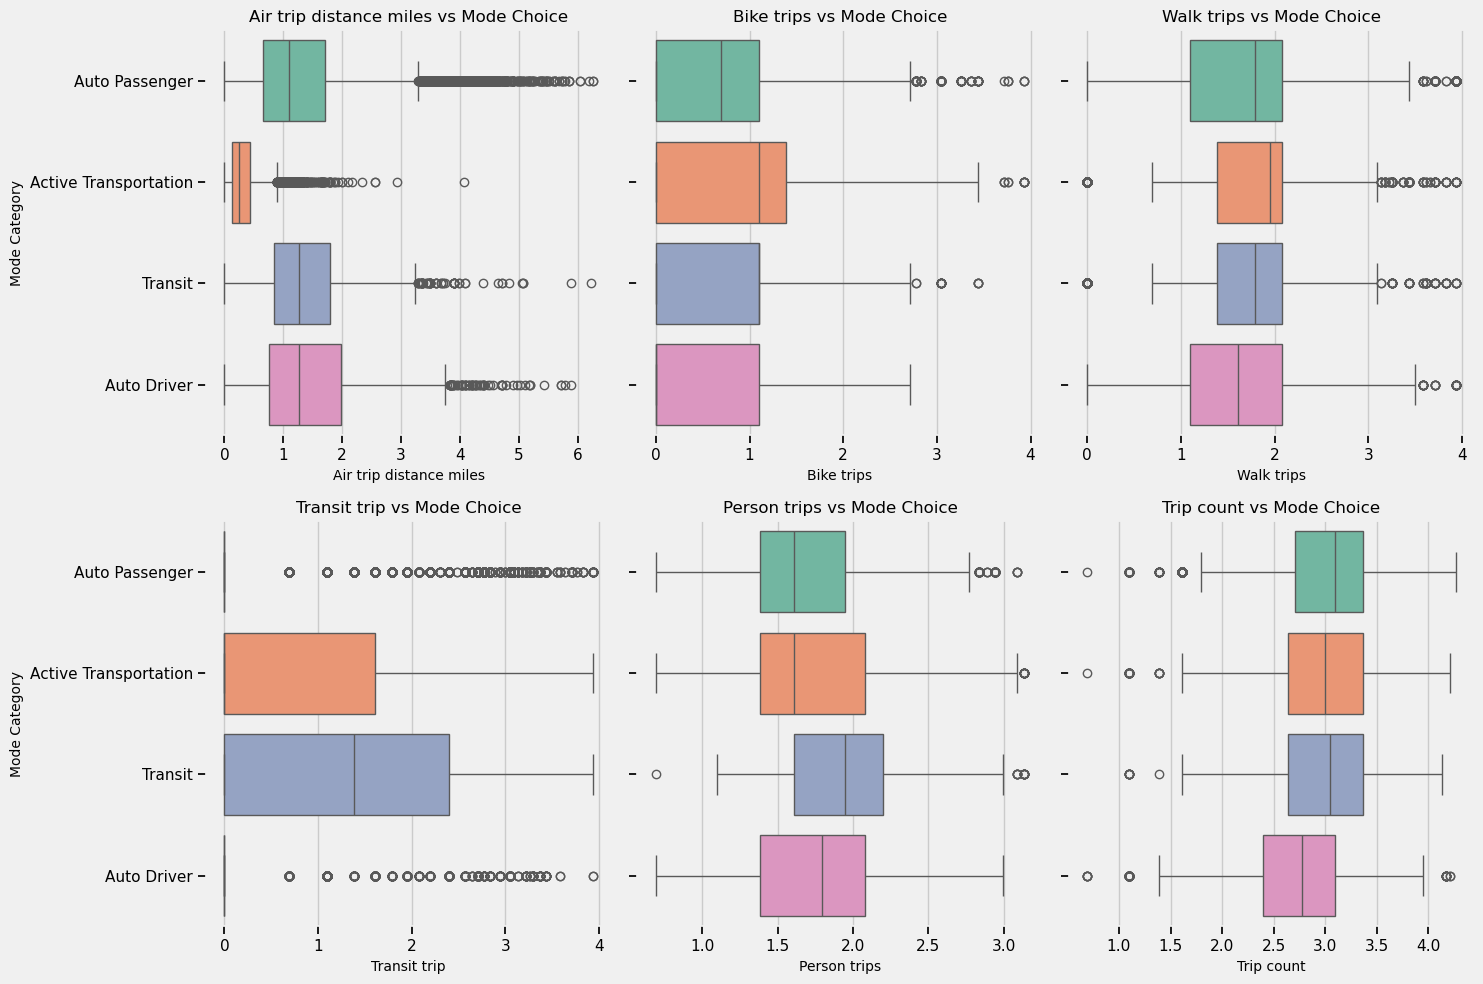

In [18]:
temp_df = df[df['mode_category'].isin(modes_to_plot)]

# Define variables to log-transform and plot
variables_to_plot = [
    'air_trip_distance_miles',
    'bike_trips',
    'walk_trips',
    'transit_trip',
    'person_trips',
    'trip_count'
]

# Apply log transformation to all variables
for var in variables_to_plot:
    temp_df[f'log_{var}'] = np.log1p(temp_df[var])

# Update variable names to use the log-transformed versions
log_variables_to_plot = [f'log_{var}' for var in variables_to_plot]

# Create subplots for the log-transformed variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate over variables and create a box plot for each
for i, var in enumerate(log_variables_to_plot):
    sns.boxplot(
        data=temp_df,
        x=var,
        y='mode_category',
        palette='Set2',
        ax=axes[i]
    )
    axes[i].set_title(f'{var.replace("log_", "").replace("_", " ").capitalize()} vs Mode Choice', fontsize=12)
    axes[i].set_xlabel(var.replace("log_", "").replace("_", " ").capitalize(), fontsize=10)
    axes[i].set_ylabel('Mode Category', fontsize=10)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

# Temporal EDA

In [19]:
# Select non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()

# Print the non-numeric columns
print("Non-numeric columns:")
print(non_numeric_columns)

Non-numeric columns:
['mode_category', 'arr_time', 'dep_time', 'city_from_zip', 'travel_date', 'school_city', 'workday_range', 'home_city', 'home_primarycity', 'model_year']


## Dropping Redundant Columns

In [20]:
# workday_range is for workers
# home_city, home_primarycity, school_city overlap with city_from_zip
df_filtered = df_filtered.drop(columns=['home_primarycity', 'home_city', 'school_city', 'workday_range', 'arr_time'])

In [21]:
# Combine travel_date and dep_time into a single datetime column
df_filtered['departure_datetime'] = pd.to_datetime(df_filtered['travel_date'] + ' ' + df_filtered['dep_time'])

# Drop the original travel_date and dep_time columns if no longer needed
df_filtered = df_filtered.drop(columns=['travel_date', 'dep_time'])

In [22]:
# Create a DataFrame with only non-numeric columns
df_non_numeric = df_filtered[df_filtered.select_dtypes(exclude=['number']).columns.tolist()]

# Display the DataFrame with non-numeric columns
df_non_numeric.head()

,mode_category,city_from_zip,model_year,departure_datetime
0,Auto Passenger,Greater Los Angeles Area,No Car,2012-05-12 11:10:00
1,Auto Passenger,Greater Los Angeles Area,No Car,2012-05-12 11:31:00
2,Auto Passenger,Greater Los Angeles Area,No Car,2012-05-12 11:52:00
3,Auto Passenger,Greater Los Angeles Area,No Car,2012-05-12 15:30:00
4,Auto Passenger,Greater Los Angeles Area,No Car,2012-05-12 08:15:00


## Handling Missing Values
Most of the missing values have already been dealt with before splitting the dataset into students & workers. Here we are just double checking.

In [23]:
# Check for null values in numeric columns
null_counts = df_filtered.isnull().sum()

# Print columns with null values
print("Numeric columns with null or NaN values:")
print(null_counts[null_counts > 0])

Numeric columns with null or NaN values:
Series([], dtype: int64)


## Temporal Features EDA

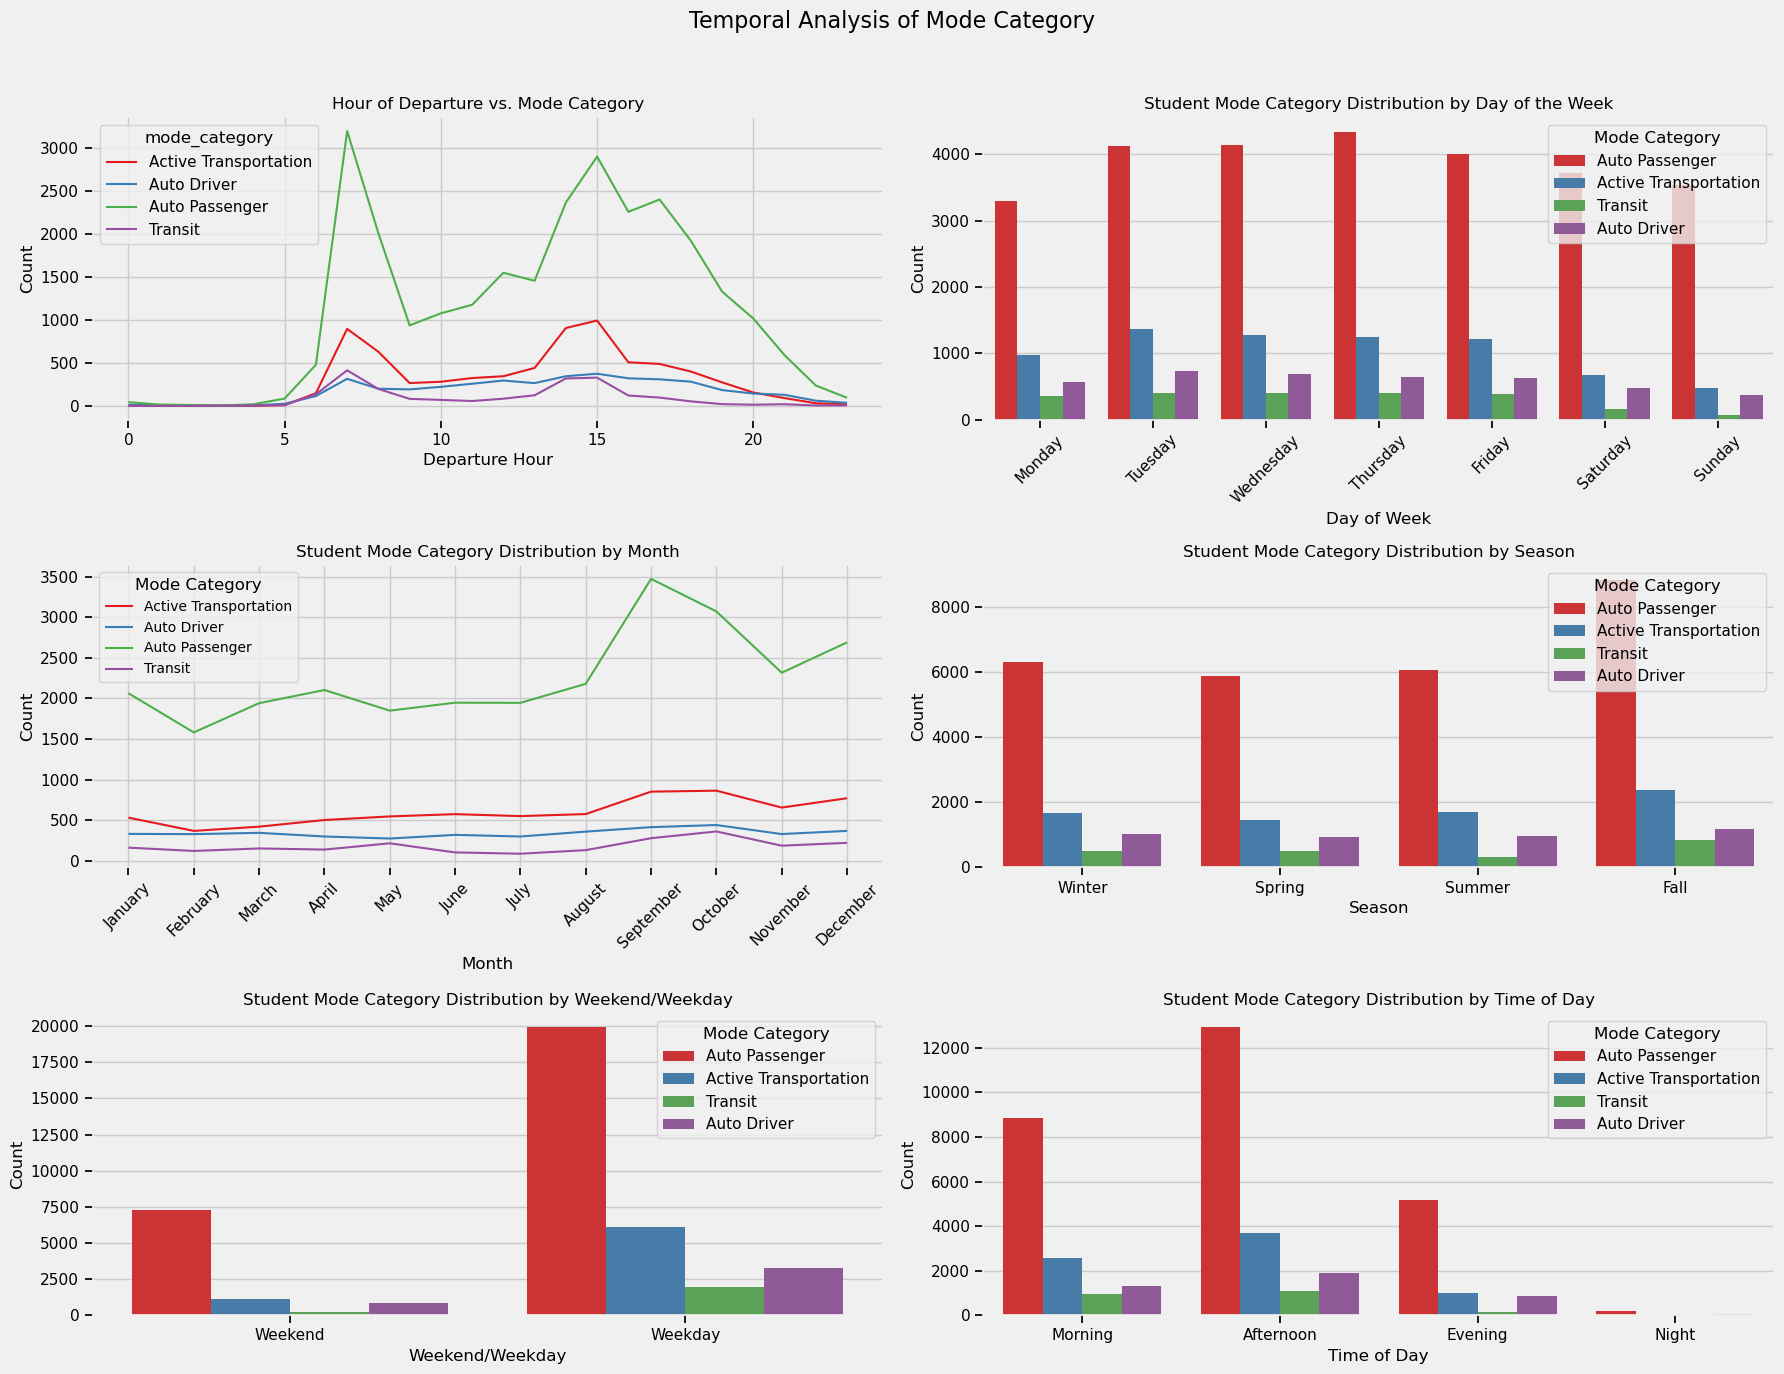

In [24]:
# Ensure 'departure_datetime' is in datetime format
df_filtered['departure_datetime'] = pd.to_datetime(df_filtered['departure_datetime'])

# Create necessary temporal features
df_filtered['departure_hour'] = df_filtered['departure_datetime'].dt.hour
df_filtered['day_of_week'] = df_filtered['departure_datetime'].dt.day_name()
df_filtered['month'] = pd.Categorical(
    df_filtered['departure_datetime'].dt.strftime('%B'),
    categories=['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)

# Map seasons
seasons = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}
df_filtered['season'] = df_filtered['departure_datetime'].dt.month.map(seasons)

# Create 'is_weekend' feature
df_filtered['is_weekend'] = df_filtered['day_of_week'].isin(['Saturday', 'Sunday']).replace({True: 'Weekend', False: 'Weekday'})

# Map times of the day
def map_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df_filtered['time_of_day'] = df_filtered['departure_hour'].apply(map_time_of_day)

# Create the figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
fig.suptitle('Temporal Analysis of Mode Category', fontsize=16)

# Subplot 1: Line plot of hour of departure vs. mode category
hourly_data = df_filtered.groupby(['departure_hour', 'mode_category']).size().reset_index(name='count')
sns.lineplot(data=hourly_data, x='departure_hour', y='count', hue='mode_category', palette='Set1', ax=axes[0, 0])
axes[0, 0].set_title('Hour of Departure vs. Mode Category')
axes[0, 0].set_xlabel('Departure Hour')
axes[0, 0].set_ylabel('Count')

# Subplot 2: Student Mode Category Distribution by day of week
sns.countplot(data=df_filtered, x='day_of_week', hue='mode_category', palette='Set1',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=axes[0, 1])
axes[0, 1].set_title('Student Mode Category Distribution by Day of the Week')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Mode Category')
axes[0, 1].tick_params(axis='x', rotation=45)

# Subplot 3: Student Mode Category Distribution by month
monthly_data = df_filtered.groupby(['month', 'mode_category']).size().reset_index(name='count')
sns.lineplot(data=monthly_data, x='month', y='count', hue='mode_category', palette='Set1',
             ax=axes[1, 0])
axes[1, 0].set_title('Student Mode Category Distribution by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title='Mode Category', loc='best', fontsize=10)

# Subplot 4: Student Mode Category Distribution by season
sns.countplot(data=df_filtered, x='season', hue='mode_category', palette='Set1', ax=axes[1, 1],
              order=['Winter', 'Spring', 'Summer', 'Fall'])
axes[1, 1].set_title('Student Mode Category Distribution by Season')
axes[1, 1].set_xlabel('Season')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Mode Category')

# Subplot 5: Student Mode Category Distribution by weekend/weekday
sns.countplot(data=df_filtered, x='is_weekend', hue='mode_category', palette='Set1', ax=axes[2, 0])
axes[2, 0].set_title('Student Mode Category Distribution by Weekend/Weekday')
axes[2, 0].set_xlabel('Weekend/Weekday')
axes[2, 0].set_ylabel('Count')
axes[2, 0].legend(title='Mode Category')

# Subplot 6: Student Mode Category Distribution by time of day
sns.countplot(data=df_filtered, x='time_of_day', hue='mode_category', palette='Set1', 
              order=['Morning', 'Afternoon', 'Evening', 'Night'], ax=axes[2, 1])
axes[2, 1].set_title('Student Mode Category Distribution by Time of Day')
axes[2, 1].set_xlabel('Time of Day')
axes[2, 1].set_ylabel('Count')
axes[2, 1].legend(title='Mode Category')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

# Geospatial Features EDA

In [25]:
df_non_numeric['city_from_zip'].unique()

array(['Greater Los Angeles Area', 'Sacramento Area',
       'San Francisco Bay Area', 'Stockton Area', 'San Diego County',
       'Riverside-San Bernardino', 'Fresno Area', 'Bakersfield Area'],
      dtype=object)

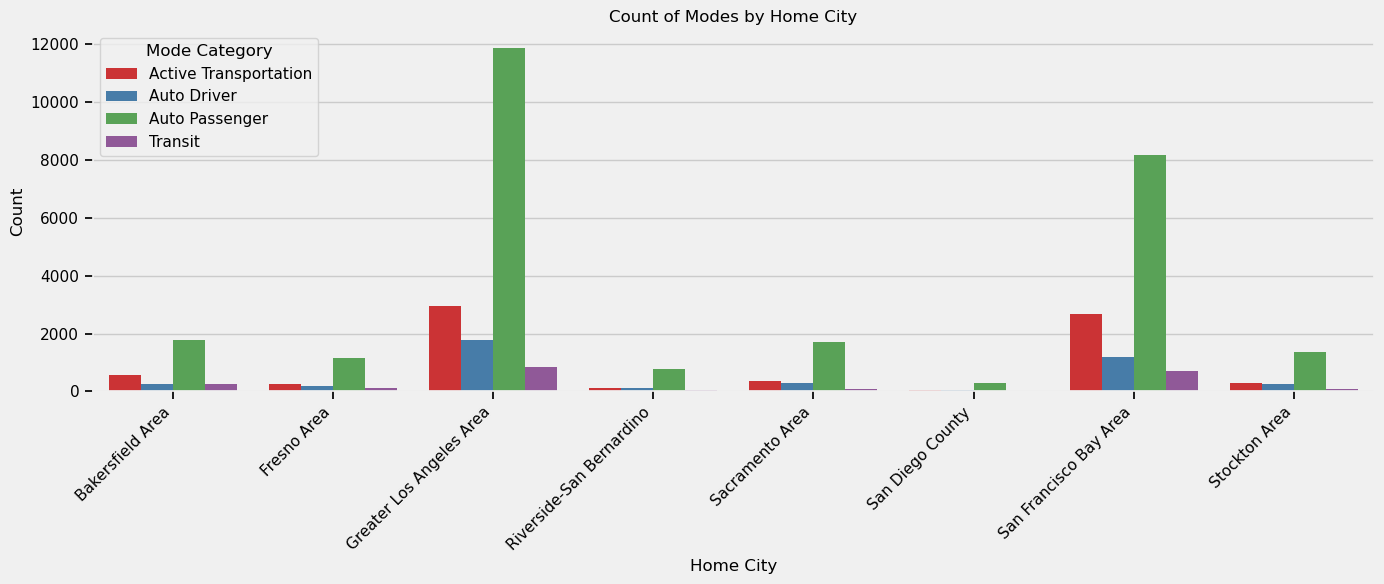

In [26]:
# Group by 'home_city' and 'mode_category' to get counts
home_city_mode_counts = df_filtered.groupby(['city_from_zip', 'mode_category']).size().reset_index(name='count')

# Create the plot
plt.figure(figsize=(14, 6))
sns.barplot(data=home_city_mode_counts, x='city_from_zip', y='count', hue='mode_category', palette='Set1')

# Customize the plot
plt.title('Count of Modes by Home City')
plt.xlabel('Home City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels by 90 degrees
plt.legend(title='Mode Category')
plt.tight_layout()

plt.show()

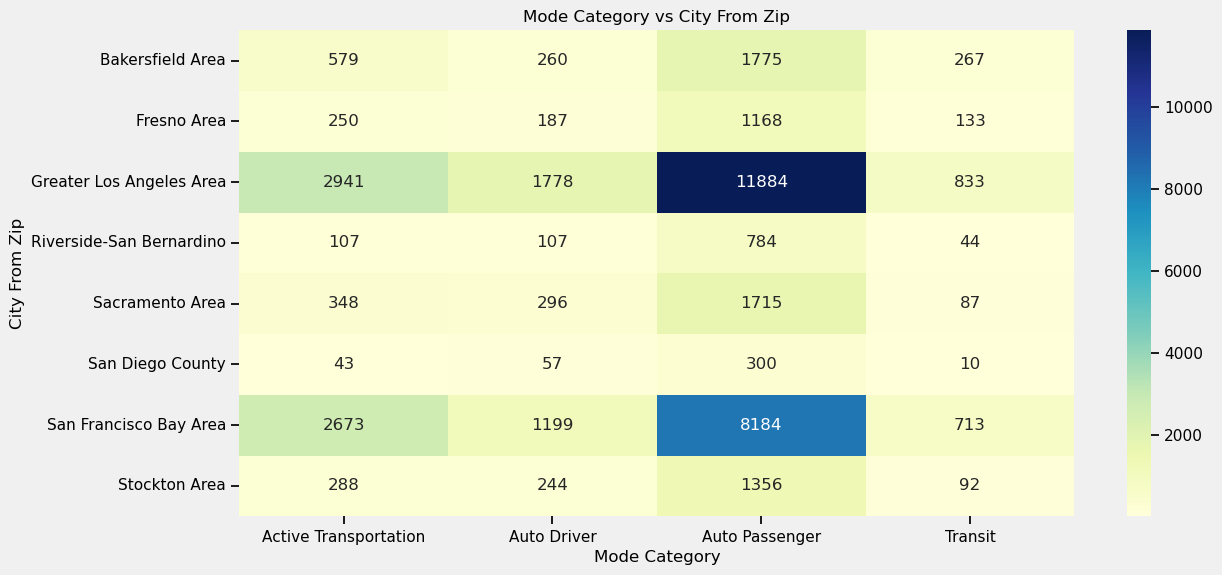

In [27]:
# Create a crosstab for city_from_zip and mode_category
city_mode_crosstab = pd.crosstab(df_filtered['city_from_zip'], df_filtered['mode_category'])

# Heatmap for better visualization
plt.figure(figsize=(12, 6))
sns.heatmap(city_mode_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Mode Category vs City From Zip')
plt.xlabel('Mode Category')
plt.ylabel('City From Zip')
plt.show()

In [28]:
import folium
from folium import Circle
from folium.plugins import HeatMap

In [29]:
# Calculate mode counts by city_from_zip
mode_counts = df_filtered.groupby(['city_from_zip', 'mode_category']).size().reset_index(name='count')

# Coordinates for the centers of the mentioned areas (approximations)
area_centers = {
    'Greater Los Angeles Area': (34.0522, -118.2437),
    'Sacramento Area': (38.5816, -121.4944),
    'San Francisco Bay Area': (37.7749, -122.4194),
    'Stockton Area': (37.9577, -121.2908),
    'San Diego County': (32.7157, -117.1611),
    'Riverside-San Bernardino': (34.0522, -117.2437),
    'Fresno Area': (36.7378, -119.7871),
    'Bakersfield Area': (35.3733, -119.0187),
}

# Create the map centered around California
map_center = (36.7783, -119.4179)
m = folium.Map(location=map_center, zoom_start=6)

# Add markers for each area, color-coded by mode category
for area, coords in area_centers.items():
    area_modes = mode_counts[mode_counts['city_from_zip'] == area]
    
    # For simplicity, we are color-coding by mode_category, you can modify this based on the logic you want
    for _, row in area_modes.iterrows():
        mode = row['mode_category']
        count = row['count']
        
        # Set color based on the mode (you can customize the colors)
        mode_colors = {
            'Auto Driver': 'blue',
            'Auto Passenger': 'gray',
            'Transit': 'green',
            'Active Transportation': 'orange',
            'Other': 'red'
        }
        
        # Add a circle marker with color based on the mode
        folium.CircleMarker(
            location=coords,
            radius=count / 150,  # Adjust size based on count (you can modify this factor)
            color=mode_colors.get(mode, 'black'),
            fill=True,
            fill_color=mode_colors.get(mode, 'black'),
            fill_opacity=0.3,
            popup=f'{area}: {mode} ({count})'
        ).add_to(m)

# Add a legend to the map
legend_html = '''
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 250px;
    height: 150px;
    background-color: white;
    border:2px solid grey;
    z-index:9999;
    font-size:14px;
    padding: 10px;
">
    <b>Mode Categories:</b><br>
    <i style="background:blue; color: white; padding: 5px 10px;">&nbsp;</i> Auto Driver<br>
    <i style="background:gray; color: white; padding: 5px 10px;">&nbsp;</i> Auto Passenger<br>
    <i style="background:green; color: white; padding: 5px 10px;">&nbsp;</i> Transit<br>
    <i style="background:orange; color: white; padding: 5px 10px;">&nbsp;</i> Active Transportation<br>
    <i style="background:red; color: white; padding: 5px 10px;">&nbsp;</i> Other<br>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
m

In [30]:
# Calculate mode counts by city_from_zip
mode_counts = df_filtered.groupby(['city_from_zip', 'mode_category']).size().reset_index(name='count')

# Coordinates for the centers of the mentioned areas (approximations)
area_centers = {
    'Greater Los Angeles Area': (34.0522, -118.2437),
    'Sacramento Area': (38.5816, -121.4944),
    'San Francisco Bay Area': (37.7749, -122.4194),
    'Stockton Area': (37.9577, -121.2908),
    'San Diego County': (32.7157, -117.1611),
    'Riverside-San Bernardino': (34.0522, -117.2437),
    'Fresno Area': (36.7378, -119.7871),
    'Bakersfield Area': (35.3733, -119.0187),
}

# Mode color dictionary for heatmap
mode_colors = {
            'Auto Driver': 'blue',
            'Auto Passenger': 'gray',
            'Transit': 'green',
            'Active Transportation': 'orange',
            'Other': 'red'
}

# Function to generate a heatmap for a specific mode
def create_heatmap_for_mode(mode):
    # Filter the mode data
    mode_data = mode_counts[mode_counts['mode_category'] == mode]
    
    # Create a map centered around California
    map_center = (36.7783, -119.4179)
    m = folium.Map(location=map_center, zoom_start=6)
    
    # Prepare data for the heatmap (latitude, longitude, intensity)
    heat_data = []
    for _, row in mode_data.iterrows():
        city = row['city_from_zip']
        count = row['count']
        coords = area_centers[city]
        
        # Add the data point (latitude, longitude, intensity)
        heat_data.append([coords[0], coords[1], count])
    
    # Add heatmap layer for this mode
    HeatMap(heat_data, min_opacity=0.3, max_val=max(mode_counts['count']), radius=25, blur=5, gradient={0: 'gray', 0.5: mode_colors[mode], 1: mode_colors[mode]}).add_to(m)
    # just print it for now 
    # Save the map to an HTML file just print it for now 
    #m.save(f"heatmap_{mode}.html")
    return m

# Generate separate maps for each mode
for mode in mode_colors.keys():
    print(mode)
    create_heatmap_for_mode(mode)



Auto Driver
Auto Passenger
Transit
Active Transportation
Other


You can try heatmaps for different modes here:

In [31]:
# create_heatmap_for_mode('Active Transportation')
create_heatmap_for_mode('Auto Driver')
# create_heatmap_for_mode('Transit')
# create_heatmap_for_mode('Auto Passenger')
# create_heatmap_for_mode('Other')

In [32]:
df_filtered.to_csv('students_df_cleaned.csv')